<a href="https://colab.research.google.com/github/NikiDevelop/Django-Blog/blob/main/Prestamos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
prestamos = pd.read_csv('application_data.csv')
prestamos

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
prestamos.info()
prestamos = prestamos.dropna()
prestamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 8.1+ MB


In [ ]:
prestamos.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

# Préstamos por Género
Podemos analizar que género pide más préstamos. Como podemos ver está igualado en un 50%. No hay un claro porcentaje mayor respecto al otro, están muy parejos.

In [ ]:
#Género
orders = prestamos.CODE_GENDER.value_counts()
orders


M    4381
F    4221
Name: CODE_GENDER, dtype: int64

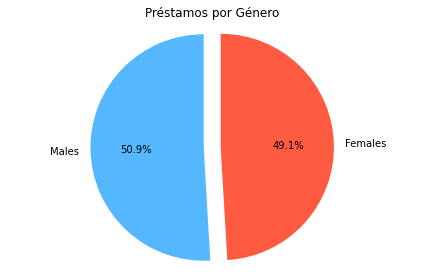

In [ ]:
# sum the instances of males and females
males = (prestamos['CODE_GENDER'] == 'M').sum()
females = (prestamos['CODE_GENDER'] == 'F').sum()


# put them into a list called proportions
proportions = [males, females]
# Create a pie chart
plt.pie(
    # using proportions
    proportions,

    # with the labels being officer names
    labels = ['Males', 'Females'],

    # with no shadows
    shadow = False,

    # with colors
    colors = ['#55B8FF','#FF5B40'],

    # with one slide exploded out
    explode = (0.15 , 0),

    # with the start angle at 90%
    startangle = 90,

    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )
# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Préstamos por Género")

# View the plot
plt.tight_layout()
plt.show()

# Tipo de Contrato
Vamos a analizar que tipo de contrato le interesa más a las personas. Como podemos ver el préstamo en efectivo gana por goleada al préstamo rotativo. Esta claro que un 89% de las personas prefieren el préstamo efectivo ya que una vez se haya pagada al 100% del préstamo el contrato se rompe pero en cambio el préstamo rotativo una vez terminado de pagar puedes volver a pedir x cantidad.

In [ ]:
#Tipo de contrato
orders = prestamos.NAME_CONTRACT_TYPE.value_counts()
orders

Cash loans         7660
Revolving loans     942
Name: NAME_CONTRACT_TYPE, dtype: int64

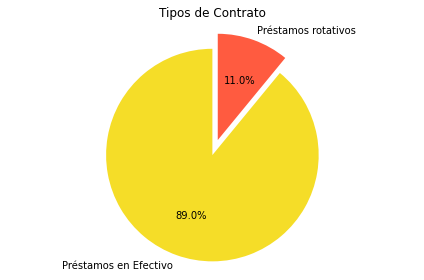

In [ ]:
cash_loans  = (prestamos['NAME_CONTRACT_TYPE'] == 'Cash loans').sum()
revolving_loans = (prestamos['NAME_CONTRACT_TYPE'] == 'Revolving loans').sum()
proportions = [cash_loans, revolving_loans]

plt.pie(
    # using proportions
    proportions,
    labels = ['Préstamos en Efectivo', 'Préstamos rotativos'],

    # with no shadows
    shadow = False,

    # with colors
    colors = ['#F5DD28','#FF5B40'],

    # with one slide exploded out
    explode = (0.15 , 0),

    # with the start angle at 90%
    startangle = 90,

    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )
# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Tipos de Contrato")

# View the plot
plt.tight_layout()
plt.show()

In [ ]:
#Estado de personas que más piden préstamos
orders = prestamos.NAME_FAMILY_STATUS.value_counts()
orders

Married                 6139
Single / not married    1159
Civil marriage           733
Separated                470
Widow                    101
Name: NAME_FAMILY_STATUS, dtype: int64

# ¿Quienes son los que más piden préstamos?
Vamos a analizar el estado de las personas que piden un préstamo.
Como podemos ver entorno a un 80% están casados frente al 13.6% están solteros y un 5.5% separados.
Al igual podemos ver que grupo tiene hijos y cuantos tienen.
En base a estos datos podemos saber a que grupo de personas podemos darle un préstamo, y además hacer una campaña específica al grupo que deseamos que pidan nuestros préstamos.

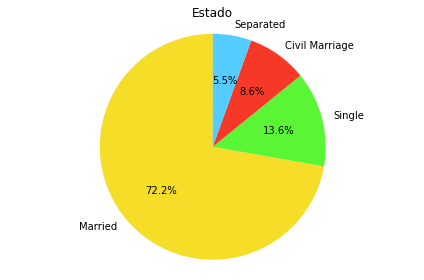

In [ ]:
married = (prestamos['NAME_FAMILY_STATUS'] == 'Married').sum()
single = (prestamos['NAME_FAMILY_STATUS'] == 'Single / not married').sum()
civil_marriage = (prestamos['NAME_FAMILY_STATUS'] == 'Civil marriage').sum()
separated = (prestamos['NAME_FAMILY_STATUS'] == 'Separated').sum()
proportions = [married, single,civil_marriage,separated]
plt.pie(
    # using proportions
    proportions,
    labels = ['Married', 'Single','Civil Marriage','Separated'],
     # with no shadows
    shadow = False,

    # with colors
    colors = ['#F5DD28','#5AF535','#F53926','#54CCFF'],

    # with one slide exploded out
    explode = (0,0,0,0),

    # with the start angle at 90%
    startangle = 90,

    # with the percent listed as a fraction
    autopct = '%1.1f%%'
)
# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Estado")

# View the plot
plt.tight_layout()
plt.show()

In [ ]:
#Personas con hijos
prestamos.groupby(by=['NAME_FAMILY_STATUS']).sum()['CNT_CHILDREN']


NAME_FAMILY_STATUS
Civil marriage           350
Married                 4274
Separated                261
Single / not married     271
Widow                     27
Name: CNT_CHILDREN, dtype: int64

In [ ]:
#Cuantos hijos tienen
orders = prestamos.CNT_CHILDREN.value_counts()
orders

0    4822
1    2512
2    1146
3     111
4       9
5       2
Name: CNT_CHILDREN, dtype: int64

In [ ]:
#0 pagan. 1 morosos
orders = prestamos.TARGET.value_counts()
orders

0    8076
1     526
Name: TARGET, dtype: int64

In [ ]:
prestamos[['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','AMT_CREDIT','FLAG_OWN_CAR']]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_CREDIT,FLAG_OWN_CAR
71,0,Cash loans,M,573628.5,Y
124,0,Cash loans,F,260725.5,Y
152,0,Cash loans,F,675000.0,Y
161,0,Cash loans,M,263686.5,Y
255,1,Cash loans,M,1019205.0,Y
...,...,...,...,...,...
307358,0,Cash loans,F,361462.5,Y
307359,0,Cash loans,F,675000.0,Y
307407,1,Cash loans,F,711454.5,Y
307456,0,Cash loans,F,270000.0,Y


In [ ]:
prestamos[['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','AMT_CREDIT','FLAG_OWN_CAR','CNT_CHILDREN','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']]


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_CREDIT,FLAG_OWN_CAR,CNT_CHILDREN,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
71,0,Cash loans,M,573628.5,Y,0,Married,House / apartment
124,0,Cash loans,F,260725.5,Y,1,Separated,House / apartment
152,0,Cash loans,F,675000.0,Y,0,Married,House / apartment
161,0,Cash loans,M,263686.5,Y,0,Married,House / apartment
255,1,Cash loans,M,1019205.0,Y,1,Single / not married,House / apartment
...,...,...,...,...,...,...,...,...
307358,0,Cash loans,F,361462.5,Y,2,Married,House / apartment
307359,0,Cash loans,F,675000.0,Y,1,Separated,House / apartment
307407,1,Cash loans,F,711454.5,Y,1,Married,House / apartment
307456,0,Cash loans,F,270000.0,Y,0,Married,House / apartment


In [ ]:
morosos =  prestamos[ prestamos["TARGET"] < 1 ]
morosos



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
296,100341,0,Cash loans,M,Y,Y,0,76500.0,545040.0,20677.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307215,455923,0,Cash loans,M,Y,N,0,157500.0,225000.0,15034.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
morosos =  prestamos[ prestamos["TARGET"] > 0 ]
morosos

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
492,100567,1,Revolving loans,M,Y,Y,0,99000.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
765,100879,1,Cash loans,F,Y,Y,0,450000.0,1323000.0,47650.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
1471,101730,1,Cash loans,F,Y,N,2,90000.0,450000.0,19066.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
1691,101980,1,Cash loans,F,Y,N,0,135000.0,508495.5,26091.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304835,453178,1,Cash loans,M,Y,Y,1,225000.0,220500.0,17806.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
305640,454115,1,Cash loans,F,Y,N,0,112500.0,557005.5,30348.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0
306452,455053,1,Cash loans,F,Y,Y,2,324000.0,945000.0,30613.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
306957,455629,1,Cash loans,F,Y,Y,2,135000.0,219249.0,16083.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
